<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#checks" data-toc-modified-id="checks-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>checks</a></span></li></ul></li><li><span><a href="#Host-tree-subsample" data-toc-modified-id="Host-tree-subsample-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Host tree subsample</a></span></li><li><span><a href="#PGLS" data-toc-modified-id="PGLS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PGLS</a></span><ul class="toc-item"><li><span><a href="#Digestive-system" data-toc-modified-id="Digestive-system-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Digestive system</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Digestive-system-(simplified)" data-toc-modified-id="Digestive-system-(simplified)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Digestive system (simplified)</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Diet" data-toc-modified-id="Diet-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Diet</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#significant-values" data-toc-modified-id="significant-values-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>significant values</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.3.3.1"><span class="toc-item-num">6.3.3.1&nbsp;&nbsp;</span>Saving results</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.3.3.2"><span class="toc-item-num">6.3.3.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* PGLS to assess alpha diversity associations with diet or digestive systems

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_clr-genus.RDS'

# diversity
alpha_div_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/diversity-qiime2/alpha_div_genus.RDS'
alpha_div_hill_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/diversity//alpha_div_iNEXT.RDS'

# host tree
host_tree_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch_IndD.nwk'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(ape)
library(ade4)
library(caper)
library(phyloseq)

library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘caper’ was built under R version 3.6.3”
Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: mvtnorm

Warning message:
“package ‘mvtnorm’ was built under R version 3.6.3”
Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)
RhpcBLASctl::blas_set_num_threads(1)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 57 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 57 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 57 tips and 56 internal nodes ]

In [5]:
# otu table
otu = physeq %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu = otu %>% t %>% as.data.frame
otu

,c3b19986023201183d07b2bf6dc9eaab,e6ddd5efa2e9229aa04f33e832450fa8,5887dc080d027d30580310a1eb1f3166,c0eb38cd52d8be27c54de8a8b06f9a9a,bfb96cf07d2fec50b18d3a9665ba6e80,66cc60d5322fdeaf48cc8bdd82effea2,f906aca9a9c84f01cbd8a874cce7e6fe,1936b1a270b058c5754be0addc7c7c31,252850216e7d0123bfafd7eed609799d,7950a70a07006f7c7b0c6f02c46a93af,⋯,092547e9f87986180c27587156336bcb,2987f396047df01622b365b3b667a4eb,fef8ef65bd3598e9f1fec3bd32a9b4bd,b9abd819fdd733c57642461d1c2247a6,75f3ea1df98051a1b49107173aa51a32,1578a874797e43b052a66b2fb5ef9e4a,b7ed842d3fbe5d8d33504a0a765409ae,1f1f87cab902b66753b8bbd81e69a7d4,250a31c11dbecf1e2ef705424fdaa7a7,188795b8eb1edbd3334be2676ca05391
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,0.3533185,0.32246438,2.91428908,0.3254381,0.3703154,0.3612832,0.30778200,0.27413385,0.3629528,0.29043538,⋯,0.1665158,-0.03874821,0.4547095,0.2546676,0.73849765,-2.920287,-3.236448,-2.117767,8.7026399,0.4149247
F35_Red_Deer,0.0982570,0.06740287,0.04961681,4.4809734,0.1152539,0.1062217,0.05272048,0.01907233,0.1078913,0.03537386,⋯,2.7692054,-0.64532655,-0.1518688,-0.3519108,0.03596791,1.275840,-3.843026,3.204286,-0.3493636,-0.1916536
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,0.1988029,0.1679488,0.1501628,0.1709225,0.2157999,0.2067676,0.1532664,0.1196183,0.2084372,0.1359198,⋯,3.234569,-0.3855593,0.1078984,4.675893,0.5839821,-2.158147,-3.583259,-2.46457812,-0.08959639,0.0681136
X67_European_Roe,-0.4190308,-0.4498850,-0.4676710,-0.4469112,-0.4020339,-0.4110661,-0.4645673,-0.4982155,-0.4093965,-0.4819140,⋯,-2.166684,-1.5943665,-1.1009088,-1.300951,-0.9130721,1.004511,-4.792066,-0.03111916,-1.29840360,-1.1406936


In [6]:
# metadata
metadata = physeq %>% 
    phyloseq2df(sample_data) %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name),
           digestive_system = gsub('fermentation activity ', '', digestive_system),
           dig_sys = gsub('simple ', '', digestive_system)) %>%
    as.data.frame
rownames(metadata) = metadata$SampleID
metadata 

,SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample,dig_sys
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
F14_Common_Bream,F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream,simple
F35_Red_Deer,F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505,F35_Red_Deer,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,X431_Quagga,431,Steppenzebra,Quagga,Equus_quagga,NA,89252,Mammalia,Perissodactyla,Equidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,X431_Quagga,hindgut
X67_European_Roe,X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe,foregut


In [12]:
# alpha diversity calculated by QIIME2 (rarefaction)
alpha_div = readRDS(alpha_div_file) %>%
    do.call(cbind, .) %>%
    mutate(Sample = rownames(.))
rownames(alpha_div) = alpha_div$Sample
alpha_div

,pielou_e,observed_otus,shannon,faith_pd,Sample
,<dbl>,<int>,<dbl>,<dbl>,<chr>
F14_Common_Bream,0.4255973,7,1.194803,2.629572,F14_Common_Bream
F35_Red_Deer,0.7088848,5,1.645979,3.286218,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,0.43631269,4,0.87262539,2.754449,X431_Quagga
X67_European_Roe,0.03762236,2,0.03762236,1.109893,X67_European_Roe


In [10]:
# # alpha diversity estimated by iNEXT
# alpha_div_hill = readRDS(alpha_div_hill_file)
# alpha_div_hill %>% names

# alpha_div_hill = alpha_div_hill$AsyEst
# alpha_div_hill

In [11]:
# # joining alpha div
# overlap(alpha_div$Sample, alpha_div_hill$Site)

# alpha_div = alpha_div %>%
#     inner_join(alpha_div_hill %>% 
#                    filter(Diversity == 'Shannon diversity') %>%
#                    dplyr::select(Site, Estimator) %>%
#                    rename('shannon_hill' = Estimator),
#                c('Sample'='Site')) %>%
#     as.data.frame

# rownames(alpha_div) = alpha_div$Sample
# alpha_div$Sample = NULL
# alpha_div

In [13]:
# host phylogeny
host_tree = read.tree(host_tree_IndD_file)
host_tree


Phylogenetic tree with 185 tips and 184 internal nodes.

Tip labels:
	X60_European_Chub, X179_Roach, X330_Ide, X327_Silver_Bream, X326_Silver_Bream, F14_Common_Bream, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

## Format

In [14]:
diet_vars = c(
'diet',
'diet_vertebrate',
'diet_invertebrate',
'diet_fruit',
'diet_flowers_nectar_pollen',
'diet_leaves_branches_bark_buds',
'diet_seeds',
'diet_grass_waterplants',
'diet_roots_tubers',
'digestive_system',
'dig_sys'
)
alpha_div = cbind(metadata[,diet_vars], alpha_div)
alpha_div

,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,dig_sys,pielou_e,observed_otus,shannon,faith_pd,Sample
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>
F14_Common_Bream,omnivore,no,yes,no,no,no,no,yes,no,simple,simple,0.4255973,7,1.194803,2.629572,F14_Common_Bream
F35_Red_Deer,herbivore,no,no,yes,no,yes,yes,yes,yes,foregut,foregut,0.7088848,5,1.645979,3.286218,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,herbivore,no,no,no,no,no,yes,yes,no,hindgut,hindgut,0.43631269,4,0.87262539,2.754449,X431_Quagga
X67_European_Roe,herbivore,no,no,yes,no,yes,yes,yes,no,foregut,foregut,0.03762236,2,0.03762236,1.109893,X67_European_Roe


In [15]:
# encoding diet vars as numeric
alpha_div$diet = case_when(alpha_div$diet == 'herbivore' ~ 1,
                           alpha_div$diet == 'omnivore' ~ 0.5,
                           alpha_div$diet == 'carnivore' ~ 0)

alpha_div$digestive_system = case_when(alpha_div$digestive_system == 'hindgut' ~ 0,
                                 alpha_div$digestive_system == 'simple hindgut' ~ 0.25,
                                 alpha_div$digestive_system == 'simple' ~ 0.5,
                                 alpha_div$digestive_system == 'simple foregut' ~ 0.75,
                                 alpha_div$digestive_system == 'foregut' ~1)


alpha_div$dig_sys = case_when(alpha_div$dig_sys == 'hindgut' ~ 0,
                        alpha_div$dig_sys == 'simple' ~ 0.5,
                        alpha_div$dig_sys == 'foregut' ~1)

for(x in diet_vars[2:(length(diet_vars)-2)]){
    alpha_div[,x] = gsub(' .+', '', alpha_div[,x])
    alpha_div[,x] = ifelse(alpha_div[,x] == 'yes', 1, 0) %>% as.numeric
}

alpha_div$taxa = rownames(alpha_div)
alpha_div 

,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,dig_sys,pielou_e,observed_otus,shannon,faith_pd,Sample,taxa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
F14_Common_Bream,0.5,0,1,0,0,0,0,1,0,0.5,0.5,0.4255973,7,1.194803,2.629572,F14_Common_Bream,F14_Common_Bream
F35_Red_Deer,1.0,0,0,1,0,1,1,1,1,1.0,1.0,0.7088848,5,1.645979,3.286218,F35_Red_Deer,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,1,0,0,0,0,0,1,1,0,0,0,0.43631269,4,0.87262539,2.754449,X431_Quagga,X431_Quagga
X67_European_Roe,1,0,0,1,0,1,1,1,0,1,1,0.03762236,2,0.03762236,1.109893,X67_European_Roe,X67_European_Roe


In [16]:
# checking values
colSums(alpha_div[,1:11])

diet                diet_vertebrate 
                         120.5                           52.0 
             diet_invertebrate                     diet_fruit 
                          82.0                           74.0 
    diet_flowers_nectar_pollen diet_leaves_branches_bark_buds 
                          16.0                           93.0 
                    diet_seeds         diet_grass_waterplants 
                          79.0                          104.0 
             diet_roots_tubers               digestive_system 
                          66.0                          100.0 
                       dig_sys 
                          94.0

## checks

In [17]:
overlap(alpha_div$Sample, host_tree$tip.label)

intersect(x,y): 185 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 185 


In [18]:
# ordering
alpha_div = alpha_div[host_tree$tip.label,]
alpha_div

,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,dig_sys,pielou_e,observed_otus,shannon,faith_pd,Sample,taxa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
X60_European_Chub,0.5,1,1,0,0,0,0,1,0,0.5,0.5,0.3547527,11,1.227243,3.490057,X60_European_Chub,X60_European_Chub
X179_Roach,0.5,0,1,0,0,0,0,1,0,0.5,0.5,0.7804664,15,3.049197,3.805766,X179_Roach,X179_Roach
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X286_Short_beaked_Echidna,0,0,1,0,0,0,0,0,0,0.5,0.5,0.7067627,15,2.761245,3.094346,X286_Short_beaked_Echidna,X286_Short_beaked_Echidna
X285_Short_beaked_Echidna,0,0,1,0,0,0,0,0,0,0.5,0.5,0.5635522,10,1.872080,3.015827,X285_Short_beaked_Echidna,X285_Short_beaked_Echidna


# Host tree subsample

In [19]:
# replicate analyses with different subsets of the host phylogeny
n_reps = 100

In [20]:
#' randomly selecting one per group
tree_subsample = function(L, df, tree){
    # get subsample (note: subsampling within each species)
    to_keep = df %>% 
        group_by(scientific_name) %>% 
        sample_n(1) %>%
        .$sample
    # subsampling tree
    to_rm = setdiff(tree$tip.label, to_keep)
    tree = drop.tip(tree, to_rm)
    return(tree)
}

In [21]:
# permuted trees
df = metadata %>%
    mutate(sample = SampleID) %>%
    dplyr::select(sample, scientific_name) 

doParallel::registerDoParallel(threads)
host_tree_l = plyr::llply(as.list(1:n_reps), 
                          function(x) tree_subsample(x, df, host_tree),
                          .parallel=TRUE)
host_tree_l %>% length

[1] 100

In [22]:
# check tips per tree
lapply(host_tree_l, function(x) x$tip.label %>% length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     110     110     110     110     110 

# PGLS

In [23]:
pgls_each_var = function(y, x, tree, data){
    cdat = comparative.data(data=data, phy=tree, names.col="taxa")
    
    f = as.formula(paste(c(y, x), collapse=' ~ '))
    mod = pgls(f, cdat) %>% summary
    
    df = mod$coefficients %>% as.data.frame
    colnames(df) = c('Estimate', 'std_err', 't_value', 'p_value')
    df$R2 = mod$adj.r.squared %>% as.vector %>% .[1]
    df$x = x
    df$y = y
    df = df[2,] %>% as.data.frame
    return(df)
}

In [81]:
# #-- debug --#
# rep = 1
# host_tree = host_tree_l[[rep]]
# df = otu[host_tree$tip.label,] 

# pgls_each_var(y = '7efd5f90bad3210ac9182784e5882716',
#               x = 'diet',
#               tree = host_tree,
#               data = otu)

In [24]:
#' PGLS on each tree
pgls_each_tree = function(rep, y, x, tree_list, data, threads=1){
    tree = tree_list[[rep]]
    data = data[tree$tip.label,] 
    
    doParallel::registerDoParallel(threads)
    ret = plyr::llply(as.list(y),
                      pgls_each_var,
                      x = x,
                      tree = tree,
                      data = data,
                      .parallel = TRUE)
    ret = do.call(rbind, ret)
    ret$rep = rep
    return(ret)
}

In [25]:
#-- debug --#
y = colnames(alpha_div)[1:2]
ret = pgls_each_tree(1,
                     y = y,
                     x = 'digestive_system',
                     tree_list = host_tree_l,
                     data = alpha_div,
                     threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
colnames(ret) = y

ret 

,diet,diet_vertebrate
,<fct>,<fct>
Estimate,0.00403135270061609,0.0676961194917868
std_err,0.175049519462484,0.206667001823856
⋮,⋮,⋮
y,diet,diet_vertebrate
rep,1,1


In [26]:
# variables
alpha_div_labels = c('pielou_e', 'observed_otus', 'shannon', 'faith_pd')
alpha_div_labels

[1] "pielou_e"      "observed_otus" "shannon"       "faith_pd"

## Digestive system

In [27]:
# summary of covariate
metadata %>% .$digestive_system %>% table

.
       foregut        hindgut         simple simple foregut simple hindgut 
            56             29             72              2             26 

In [28]:
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = alpha_div_labels,
                  x = 'digestive_system',
                  tree_list = host_tree_l,
                  data = alpha_div,
                  threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
ret 

,Estimate,std_err,t_value,p_value,R2,x,y,rep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
digestive_system,0.2164783,0.2129961,1.016349,0.3117995,0.0003108921,digestive_system,pielou_e,1
digestive_system1,3.1264787,2.0135411,1.552727,0.1234975,0.0131360861,digestive_system,observed_otus,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
digestive_system299,0.3435993,0.5041955,0.6814804,0.4970679,-0.005078344,digestive_system,shannon,100
digestive_system399,0.3510708,0.5996324,0.5854768,0.5594834,-0.006238842,digestive_system,faith_pd,100


In [29]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/03_modulating_factors/04d_PGLS_IndD_alpha-div.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [30]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x),
              .groups='drop')

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2754  0.3080  0.3239  0.3774  0.3934  0.5865 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
faith_pd,0.7820865,0.6692033,1.1704508,0.2753908,1,0.0047007468,digestive_system,drop
observed_otus,1.9692544,1.9309920,1.0166492,0.3289837,1,0.0009779049,digestive_system,drop
pielou_e,0.1192272,0.2190864,0.5527001,0.5865030,1,-0.0048043149,digestive_system,drop
shannon,0.6080507,0.5603866,1.0940443,0.3189088,1,0.0035385931,digestive_system,drop


### Saving output

In [31]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_alpha-div_digSys.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_alpha-div_digSys.RDS"

In [32]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_alpha-div_digSys.RDS 


In [33]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 4 9


y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
faith_pd,0.7820865,0.6692033,1.1704508,0.2753908,1,0.0047007468,digestive_system,drop
observed_otus,1.9692544,1.9309920,1.0166492,0.3289837,1,0.0009779049,digestive_system,drop
pielou_e,0.1192272,0.2190864,0.5527001,0.5865030,1,-0.0048043149,digestive_system,drop


### Summary

In [34]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p-value,0.2753908,0.3080293,0.3239463,0.3774466,0.3933635,0.586503,0.111,0.045


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
adj p-value,1,1,1,1,1,1,0,0


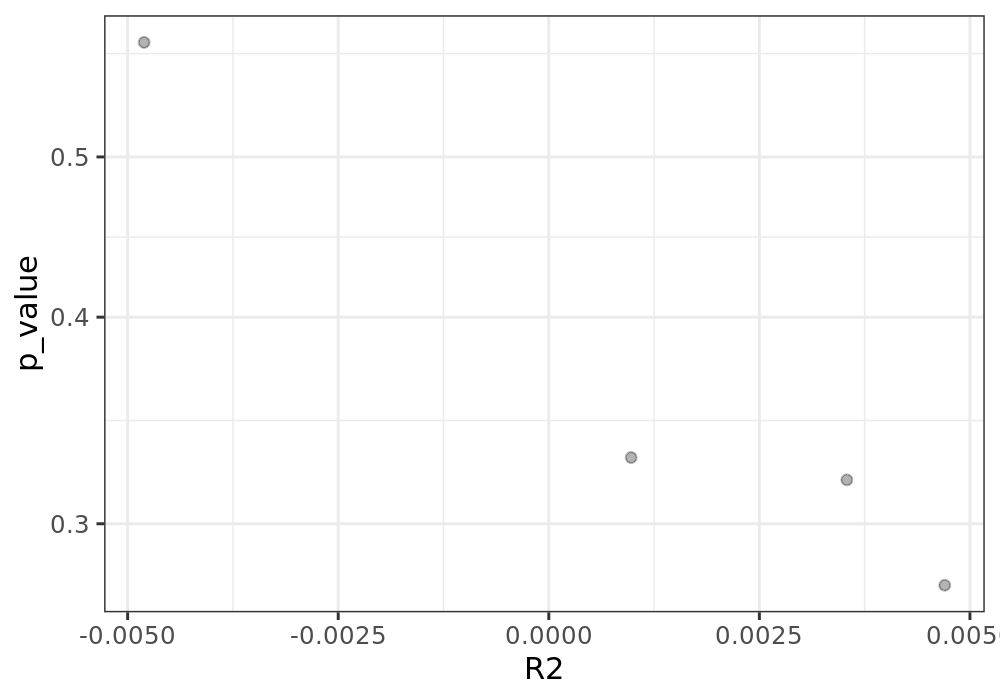

In [35]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

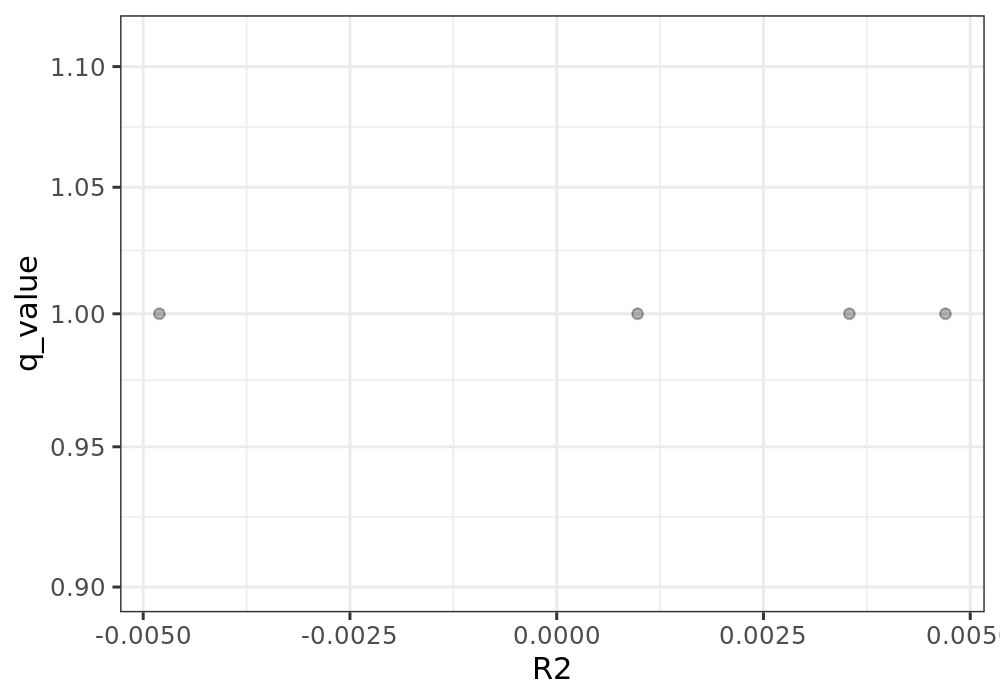

In [36]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

## Digestive system (simplified)

In [37]:
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = alpha_div_labels,
                  x = 'dig_sys',
                  tree_list = host_tree_l,
                  data = alpha_div,
                  threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
ret 

,Estimate,std_err,t_value,p_value,R2,x,y,rep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
dig_sys,0.2653877,0.1965085,1.3505155,0.1797543,0.007712619,dig_sys,pielou_e,1
dig_sys1,1.0834371,1.8829115,0.5754052,0.5662483,-0.006350535,dig_sys,observed_otus,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
dig_sys299,0.4997755,0.4550574,1.0982691,0.2745991,0.001941459,dig_sys,shannon,100
dig_sys399,0.3390341,0.5429716,0.6244048,0.5337162,-0.005789158,dig_sys,faith_pd,100


In [38]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x),
              .groups='drop')

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4284  0.4450  0.5351  0.5385  0.6286  0.6554 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
faith_pd,0.3167566,0.6329511,0.5104619,0.6196623,1,-0.0062425047,dig_sys,drop
observed_otus,0.8179568,1.8243558,0.4559701,0.6554277,1,-0.0071119604,dig_sys,drop
pielou_e,0.1654991,0.2057263,0.8276484,0.4505591,1,-0.0007922249,dig_sys,drop
shannon,0.4468346,0.5283364,0.8663004,0.4283515,1,-0.0005534662,dig_sys,drop


### Saving output

In [39]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_alpha-div_digSysSimp.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_alpha-div_digSysSimp.RDS"

In [40]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_alpha-div_digSysSimp.RDS 


In [41]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 4 9


y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
faith_pd,0.3167566,0.6329511,0.5104619,0.6196623,1,-0.0062425047,dig_sys,drop
observed_otus,0.8179568,1.8243558,0.4559701,0.6554277,1,-0.0071119604,dig_sys,drop
pielou_e,0.1654991,0.2057263,0.8276484,0.4505591,1,-0.0007922249,dig_sys,drop


### Summary

In [42]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p-value,0.4283515,0.4450072,0.5351107,0.5385001,0.6286037,0.6554277,0.092,0.038


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
adj p-value,1,1,1,1,1,1,0,0


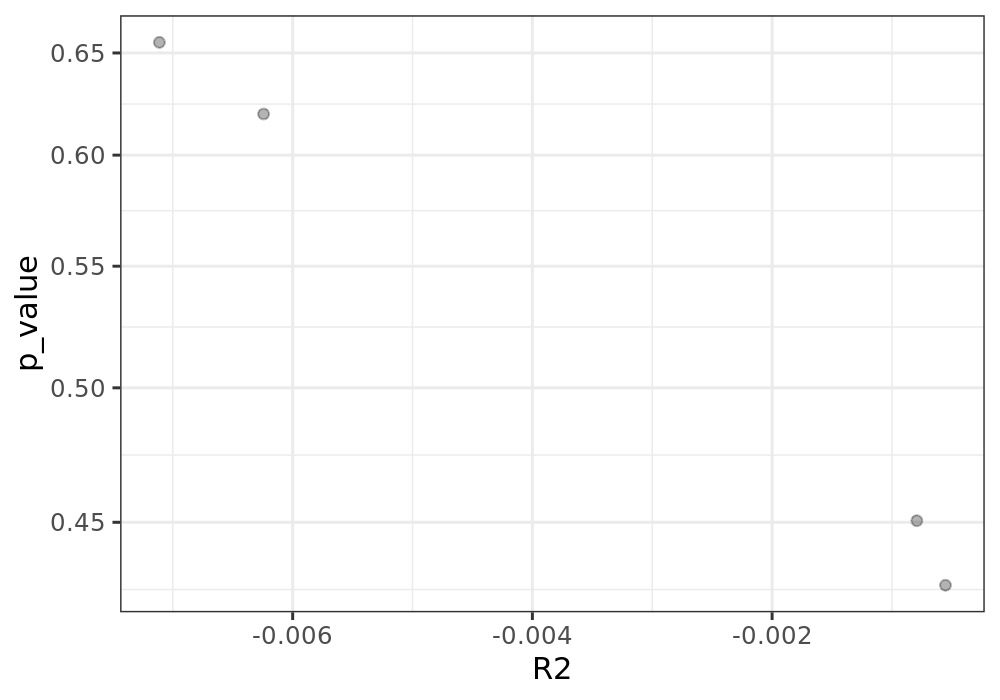

In [43]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

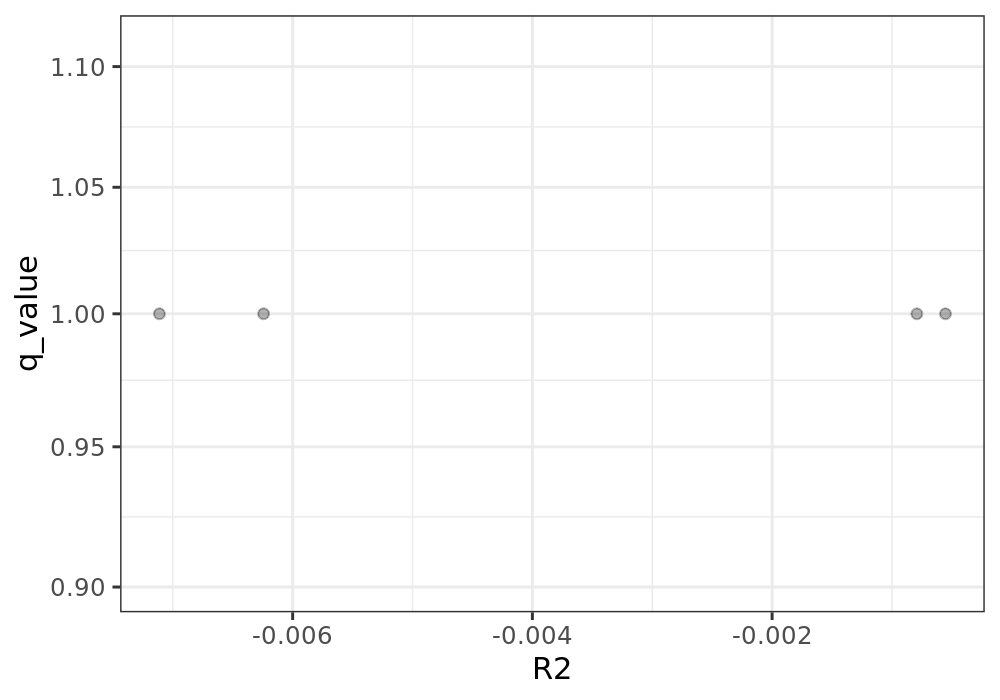

In [44]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

## Diet

In [45]:
# variables
alpha_div_labels = c('shannon', 'faith_pd')
alpha_div_labels

[1] "shannon"  "faith_pd"

In [46]:
# summary of covariate
metadata %>% .$diet %>% table

.
carnivore herbivore  omnivore 
       39        95        51 

In [47]:
# PGLS
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = alpha_div_labels,
                  x = 'diet',
                  tree_list = host_tree_l,
                  data = alpha_div,
                  threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
ret 

,Estimate,std_err,t_value,p_value,R2,x,y,rep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
diet,0.01233429,0.3336891,0.0369634,0.9705844,-0.009510673,diet,shannon,1
diet1,-0.29680721,0.3785325,-0.7840996,0.4347469,-0.003647100,diet,faith_pd,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
diet109,-0.1696726,0.2874984,-0.5901688,0.5563455,-0.006186154,diet,shannon,100
diet199,-0.4479492,0.3394837,-1.3195013,0.1898715,0.006942816,diet,faith_pd,100


In [48]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x))

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3626  0.4584  0.5542  0.5542  0.6500  0.7458 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

y,Estimate,std_err,t_value,p_value,q_value,R2,x
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
faith_pd,-0.3732528,0.3741805,-1.0049778,0.3625779,1,0.002028229,diet
shannon,-0.0643557,0.3146586,-0.2084288,0.7457699,1,-0.007893853,diet


### Saving output

In [49]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_alpha-div_diet.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_alpha-div_diet.RDS"

In [50]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_alpha-div_diet.RDS 


In [51]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 2 8


y,Estimate,std_err,t_value,p_value,q_value,R2,x
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
faith_pd,-0.3732528,0.3741805,-1.0049778,0.3625779,1,0.002028229,diet
shannon,-0.0643557,0.3146586,-0.2084288,0.7457699,1,-0.007893853,diet


In [52]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/03_modulating_factors/04d_PGLS_IndD_alpha-div.ipynb')


Sending email to: nyoungblut@tuebingen.mpg.de



### Summary

In [53]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
p-value,0.3625779,0.4583759,0.5541739,0.5541739,0.6499719,0.7457699,0.135,0.055


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
adj p-value,1,1,1,1,1,1,0,0


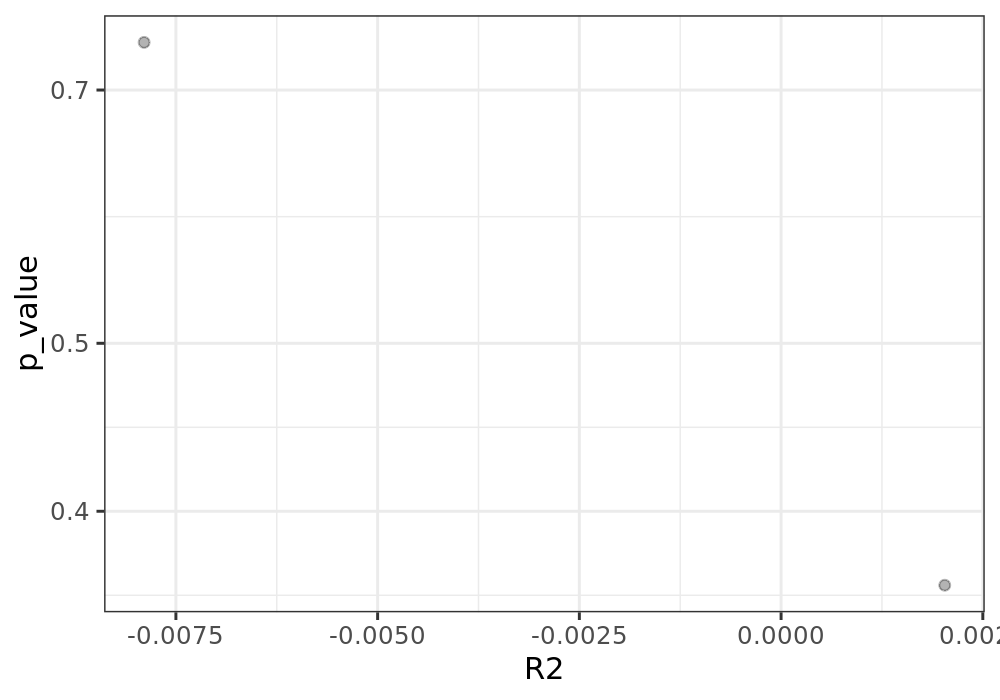

In [54]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

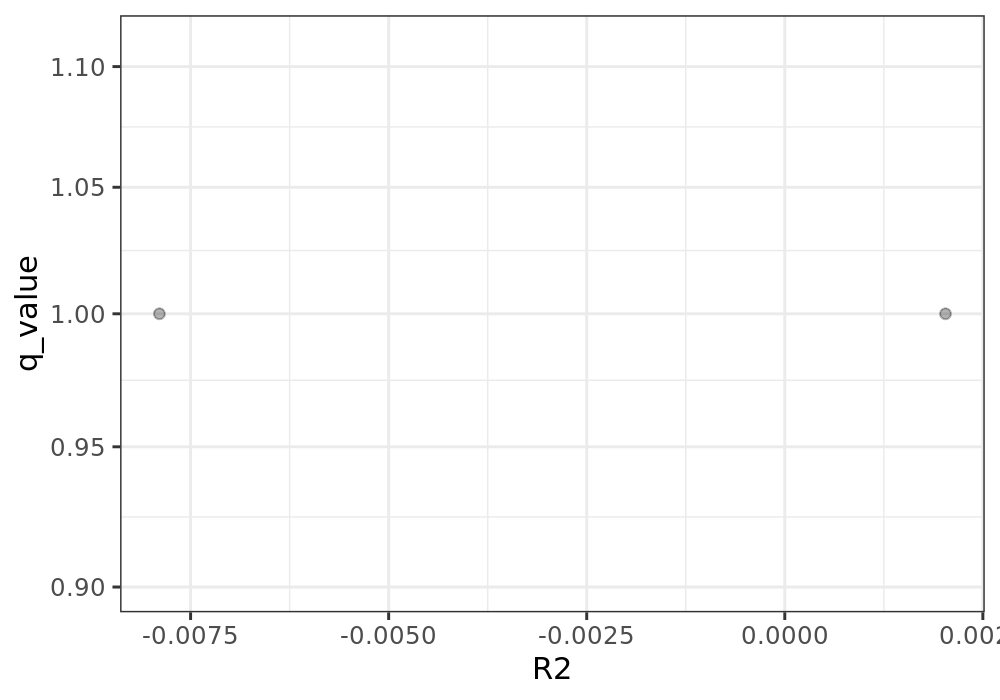

In [55]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

### significant values

In [56]:
# how many?
pgls_res %>%
    filter(q_value < 0.05) %>%
    .$y %>% unique_n('No. of OTUs')

No. of unique No. of OTUs: 0 


In [57]:
# filtering & adding taxonomy
pgls_res_j = pgls_res %>%
    filter(q_value < 0.05) %>%
    inner_join(physeq %>% 
                   phyloseq2df(tax_table) %>%
                   mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)),
               c('y' = 'OTU'))
pgls_res_j 

y,Estimate,std_err,t_value,p_value,q_value,R2,x,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [58]:
# viewing taxonomic distribution
df.dims(30)
pgls_res_j %>%
    dplyr::select(Estimate, p_value, q_value, R2,
                  Phylum, Class, Order, Family, Genus, Species) %>%
    arrange(-R2) 
df.dims()

Estimate,p_value,q_value,R2,Phylum,Class,Order,Family,Genus,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


#### Saving results

In [ ]:
# F = file.path(work_dir, 'PGLS_IndD_alpha-div_diet.RDS')
# saveRDS(pgls_res_j, file=F)
# cat('File written:', F, '\n')

# sessionInfo

In [62]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-phy/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] LeyLabRMisc_0.1.5 doParallel_1.0.15 iterators_1.0.12  foreach_1.4.7    
 [5] phyloseq_1.30.0   caper_1.0.1       mvtnorm_1.1-1     MASS_7.3-51.5    
 [9] ade4_1.7-13       ape_5.3           ggplot2_3.2.1     tidyr_1.0.0      
[13] dplyr_0.8.3      

loaded via

In [60]:
# adding taxonomy
pgls_res = pgls_res %>%
    inner_join(physeq %>% 
                   phyloseq2df(tax_table) %>%
                   mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)),
               c('y' = 'OTU'))
pgls_res

Estimate,std_err,t_value,p_value,R2,x,y,rep,q_value,Domain,Phylum,Class,Order,Family,Genus,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


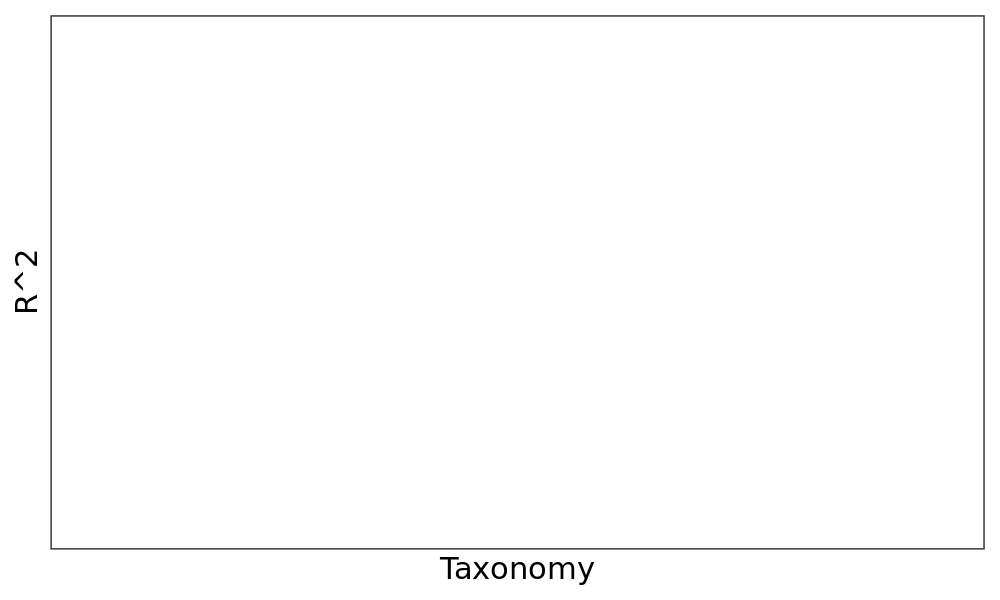

In [61]:
p = pgls_res %>%
    mutate(y = y %>% as.factor %>% as.numeric %>% gsub('^', 'ASV-', .)) %>%
    mutate(Taxonomy = paste(Order, Family, Genus, Species, y, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50)) %>%
    ggplot(aes(Taxonomy, R2, color=Class)) +
    geom_boxplot() +
    labs(y='R^2') +
    theme_bw() 

p.dims(5,3)
plot(p)